In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import functions as f
%matplotlib inline

# Read the data from a CSV file
# Original source of data: https://insights.stackoverflow.com/survey
df = pd.read_csv('data/survey_results_public.csv')
df_schema= pd.read_csv('data/survey_results_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [10]:
#Find the Column with the question regarding the importance of formal education to the career
df_schema[df_schema["QuestionText"].str.contains("career")].values

array([['NEWEdImpt',
        'How important is a formal education, such as a university degree in computer science, to your career?']],
      dtype=object)

In [11]:
#How many have answered the question?
df["NEWEdImpt"].notnull().mean()

0.7518499557872201

In [12]:
#What are the answer options and how often were they given?
df["NEWEdImpt"].value_counts()

Fairly important                      12674
Very important                        11866
Somewhat important                    11388
Not at all important/not necessary     7785
Critically important                   4752
Name: NEWEdImpt, dtype: int64

In [13]:
#Set importance order
importance_order=['Critically important','Very important','Fairly important',  'Somewhat important',
       'Not at all important/not necessary' ]

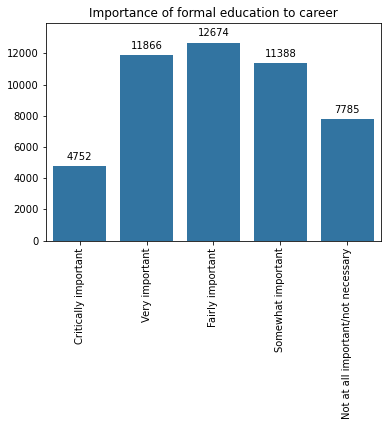

In [14]:
#Plot
f.plot_importance(df);

In [15]:
#What are the top 16 countries?
df["Country"].value_counts().head(16)

United States         12469
India                  8403
United Kingdom         3896
Germany                3890
Canada                 2191
France                 1898
Brazil                 1818
Netherlands            1343
Poland                 1278
Australia              1208
Spain                  1161
Italy                  1117
Russian Federation     1092
Sweden                  886
Pakistan                809
Turkey                  777
Name: Country, dtype: int64

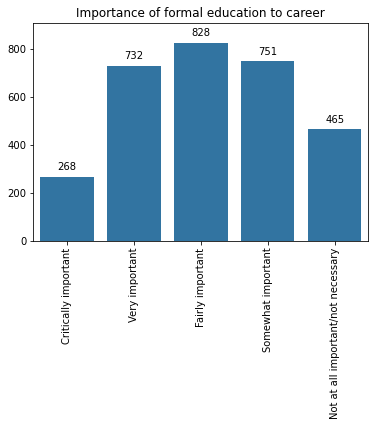

In [16]:
#Plot for Germany
f.plot_importance(df, countries=["Germany"])

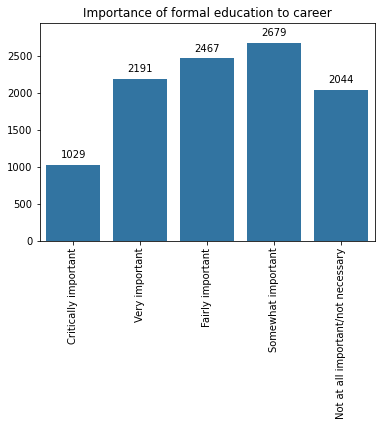

In [17]:
#Plot for USA
f.plot_importance(df, countries=["United States"])

In [18]:
#The next step is to create a plot for the most common countries.

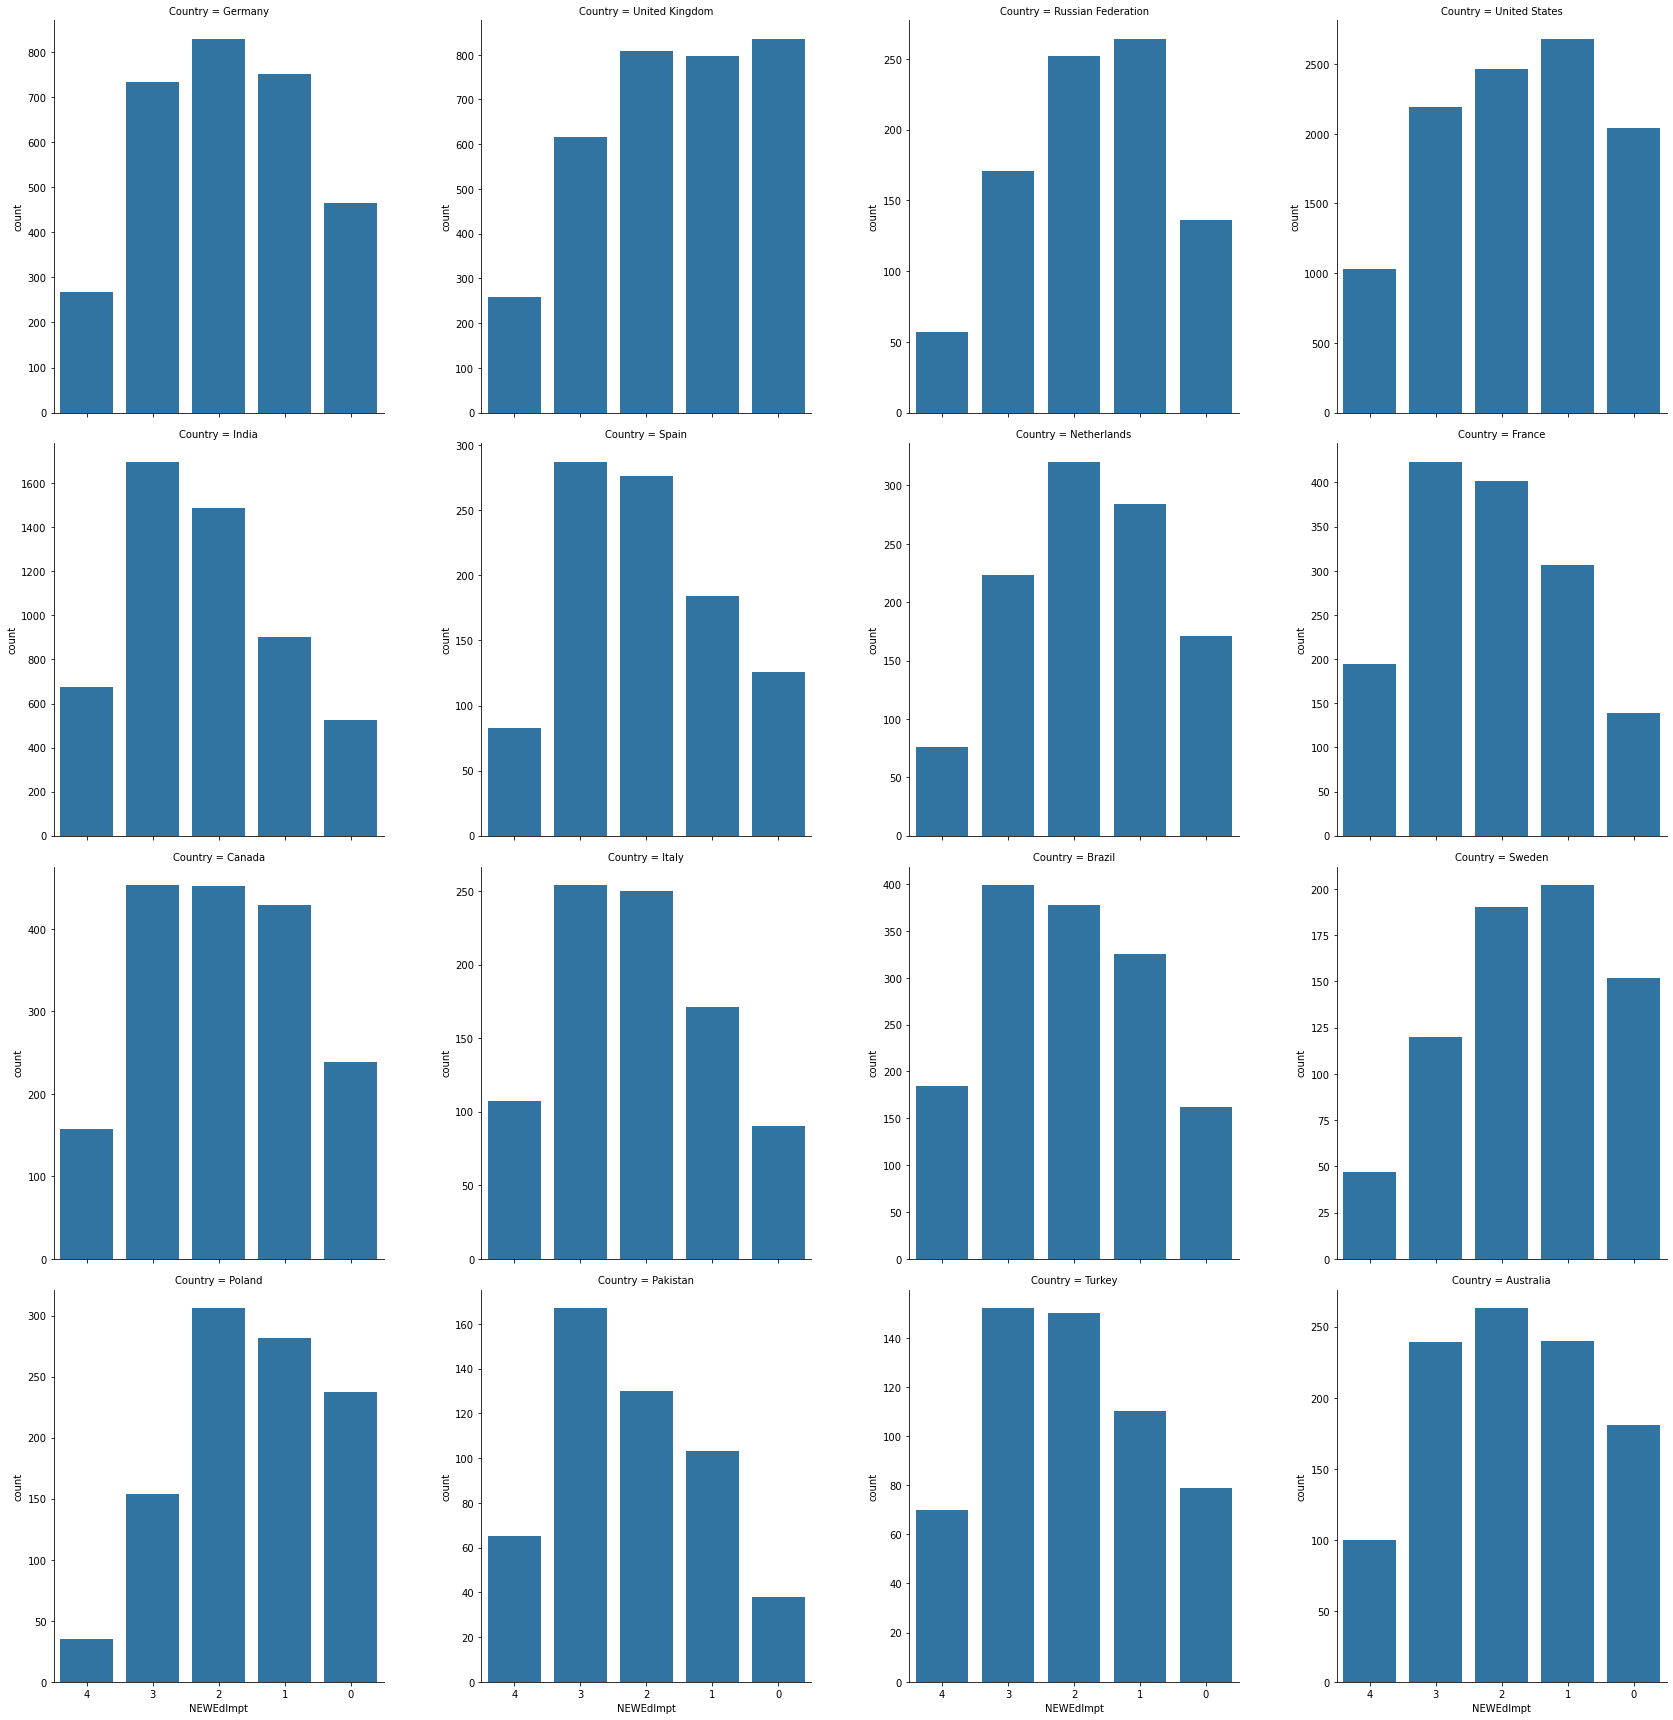

In [20]:
# create Dataframe with the top 16 countries
df_country16 = df[df['Country'].isin(df["Country"].value_counts().head(16).index)]

# plot
base_color = sb.color_palette()[0]
plot_country_importance = sb.FacetGrid(data = df_country16, col = "Country", height = 6,
col_wrap = 4, sharey=False)
plot_country_importance.map(sb.countplot,"NEWEdImpt", color = base_color, order = importance_order)
plot_country_importance.set_xticklabels([4,3,2,1,0]);

In [ ]:
#It seems that the distribution depends strongly on the respective countries.